In [71]:
import os
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # Import the to_categorical function from Keras
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense # Import the Dropout class from Keras
from tensorflow.keras.models import Sequential
import random


dataset_path = "data"
image_size = (64, 48)

print('Our dataset = ')
print(os.listdir(dataset_path))

Our dataset = 
['Grupo_0', 'Grupo_1', '.DS_Store', 'Grupo_4', 'Grupo_3', 'Grupo_2', 'Grupo_5']


Step 1: Loading DataSet

In [157]:
def load_images_from_folder(folder_path, max_depth = 5):
    images = []
    labels = []
    names = []
    corruptedFiles = []
    image_extensions = ["bmp"]

    for root, dirs, files in os.walk(folder_path):
        current_depth = root[len(folder_path):].count(os.sep)

        if ('LG' in root):
            current_depth -= 1
        

        if current_depth <= max_depth:
            for file in files:
                if any(file.lower().endswith(ext) for ext in image_extensions):
                    img_path = os.path.join(root, file)
                    try:
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, image_size)
                            images.append(img)
                            labels.append(file[6]!='0')
                            names.append(file)
                    except:
                        corruptedFiles.append(img_path)

        else:
            del dirs[:]
    
    print(f"Following {len(corruptedFiles)} files are corrupt or encountered error: \n {corruptedFiles}")

    return np.array(images), np.array(labels), np.array(names)

images, labels, names = load_images_from_folder(dataset_path)
print(f"Read {len(images)} images from the data folder with shape {images.shape}")

[ERROR:0@5099.819] global loadsave.cpp:478 imread_ imread_('data/Grupo_4/E_4_1/Iritech/E_4_1_3/E_4_1_3_R_5/E_4_1_3_R_M_N_N_1996_23_2017.bmp'): can't read data: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'

[ERROR:0@5099.876] global loadsave.cpp:478 imread_ imread_('data/Grupo_4/E_4_1/Iritech/E_4_1_4/E_4_1_4_L_M_N_N_1996_0_2017.bmp'): can't read data: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'

[ERROR:0@5099.887] global loadsave.cpp:478 imread_ imread_('data/Grupo_4/E_4_1/Iritech/E_4_1_4/E_4_1_4_R_5/E_4_1_4_R_M_N_N_1996_80_2017.bmp'): can't read data: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/im

Following 0 files are corrupt or encountered error: 
 []
Read 25201 images from the data folder with shape (25201, 48, 64)


(48, 64)


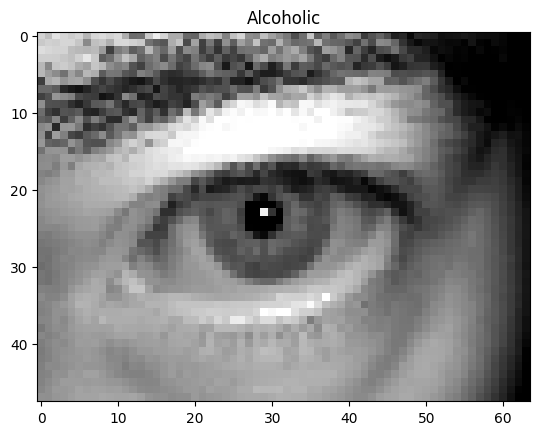

In [68]:
def showImg(index):
    plt.imshow(images[index], cmap='gray')
    plt.title('Alcoholic' if labels[index] else 'Fit for Duty')
    print(images[index].shape)

# showImg(900)

Step 2: Split images and labels into 80-20 random train test split and train cnn

In [70]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=20)

labels_train_cnn = to_categorical(labels_train, num_classes=2)
labels_test_cnn = to_categorical(labels_test, num_classes=2)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size+(1,)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(images_train, labels_train_cnn, epochs=10, batch_size=32)

Epoch 1/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.8000 - loss: 4.4316
Epoch 2/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9032 - loss: 0.2501
Epoch 3/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9264 - loss: 0.1932
Epoch 4/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9411 - loss: 0.1484
Epoch 5/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9488 - loss: 0.1332
Epoch 6/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9473 - loss: 0.1375
Epoch 7/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9536 - loss: 0.1175
Epoch 8/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9570 - loss: 0.1097
Epoch 9/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9566 - loss: 0.1085
Epoch 10/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9621 - loss: 0.0999


In [63]:
#Testing model
cnn_loss, cnn_accuracy = cnn_model.evaluate(images_test, labels_test_cnn)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9554 - loss: 0.1477
CNN Test Accuracy: 95.18%


Demonstration

In [74]:
totalTest = 0
correctTest = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0.5, 1.0, 'Name: E_5_4_3_L_F_N_N_1990_5_2017.bmp\n\nPrediction: Alcoholic\nActual: Alcoholic\n\nAccuracy: 0.9914529914529915')

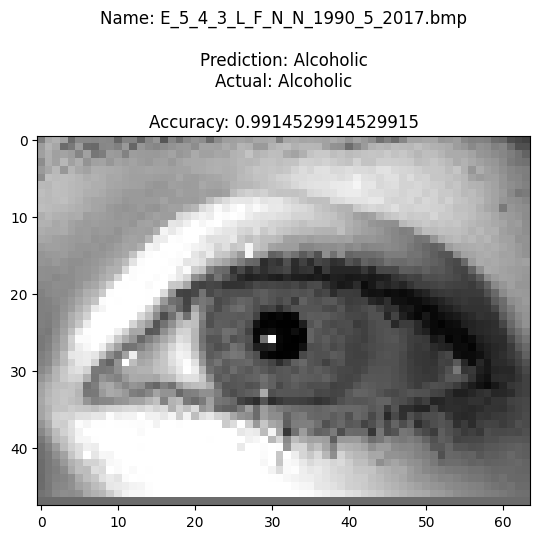

In [192]:
# testImagePath = 'data/Grupo_5/E_5_7/Iritech/E_5_7_0/E_5_7_0_L_F_N_N_1994_0_2017.bmp'
# testImg = cv2.imread(testImagePath, cv2.IMREAD_GRAYSCALE)

r_in = random.randint(0, len(images) - 1)

testImg = images[r_in]
testLabel = labels[r_in]
testImg = cv2.resize(testImg, image_size)

plt.imshow(testImg, cmap='gray')

testImg = np.expand_dims(testImg, axis=-1) 
testImg = np.expand_dims(testImg, axis=0)


prediction = cnn_model.predict(testImg)
prediction = np.argmax(prediction[0])

totalTest +=1
correctTest += prediction==testLabel

prediction = 'Alcoholic' if prediction else 'Fit for duty'
testLabel = 'Alcoholic' if testLabel else 'Fit for duty'
plt.title(f'Name: {names[r_in]}\n\nPrediction: {prediction}\nActual: {testLabel}\n\nAccuracy: {correctTest/totalTest}')